# Roads in OSM

It's called Open**Street**Map for a reason: streets are a major feature of most maps. OSM has lots of them: more than 225 million ways (lines) in OSM have a `highway` tag on them. 

Let's have some fun with roads. 

We return to Overpass for a more advanced query to retrieve all the `highway`s in my home state of Utah:

```
[out:csv(::id,::timestamp,::version,::user,::lon,::lat,"highway")];
area[name="Utah"]->.a;
way[highway](area.a);
out meta center;
```
[execute it here](https://overpass-turbo.eu/s/1Gaq)

This gives me a CSV list of all the ways in OSM that are marked `highway=something` with their OSM ID, time last modified, version number, user who last edited, the center coordinates, and the `highway` type. This looks something like

```csv
@id	@timestamp	@version	@user	@lon	@lat	highway
10075706	2020-09-04T13:49:36Z	5	atlas-3d	-112.7331164	38.2719810	residential
10075708	2021-09-01T13:25:56Z	6	atlas-3d	-112.7882958	38.2957581	track
10075710	2007-10-22T05:33:47Z	1	DaveHansenTiger	-112.6475968	38.2730475	residential
10075712	2021-12-03T16:19:46Z	6	atlas-3d	-112.9978555	38.3533131	residential
10075713	2017-03-07T08:35:38Z	4	Richard	-112.6358957	38.2480816	unclassified
10075714	2017-09-04T02:58:57Z	5	SimMoonXP	-112.6043097	38.2321777	track
10075715	2019-03-11T17:18:12Z	5	AndreThib	-112.5557895	38.2016290	track
```

Cool!

Now we can start asking questions of this data. Let's get to work!

We start simple. Like we saw before, first we import the pandas libary and then load the csv file, which I saved in the `data` directory.

In [13]:
import pandas as pd

highways_df = pd.read_csv('../data/highways-utah.csv', sep='\t')

Now let's ask it a simple question: how many roads do we have?

In [14]:
highways_df.size

3399760

Easy. Now let's make use of some of pandas analysis functions. We

In [17]:
# how many of each type of highway are there?
highways_df['highway'].value_counts()

highway
service           154029
footway           114915
residential        84923
track              61852
path               17268
tertiary           11081
unclassified       10963
primary             7277
secondary           7009
cycleway            3928
motorway_link       3089
motorway            2610
trunk               2041
steps               1946
pedestrian           654
construction         512
primary_link         319
trunk_link           251
proposed             206
secondary_link       197
tertiary_link        145
corridor              96
living_street         95
raceway               76
bridleway             64
busway                47
rest_area             30
services              12
escape                10
planned                8
elevator               7
bus_stop               6
abandoned              4
platform               3
trailhead              2
disused                2
traffic_island         2
road                   1
Name: count, dtype: int64

<Axes: xlabel='highway'>

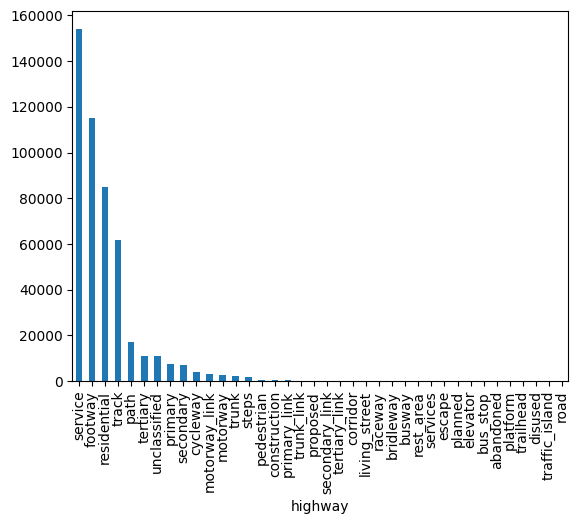

In [18]:
# plot the distribution of highway types
highways_df['highway'].value_counts().plot(kind='bar')

<Axes: xlabel='highway'>

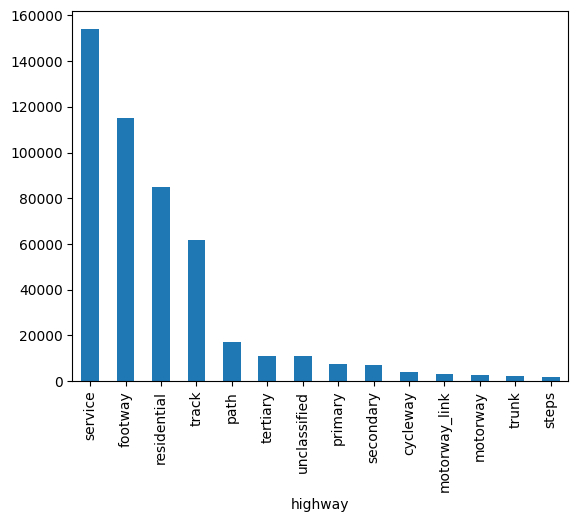

In [19]:
# plot just those that have more than 1000 instances
highways_df['highway'].value_counts()[highways_df['highway'].value_counts() > 1000].plot(kind='bar')

<Axes: ylabel='count'>

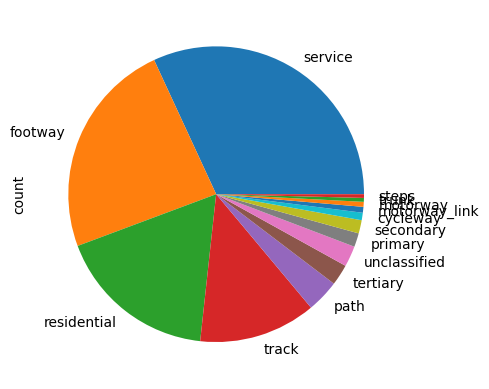

In [20]:
# as a circle
highways_df['highway'].value_counts()[highways_df['highway'].value_counts() > 1000].plot(kind='pie')

<Axes: ylabel='count'>

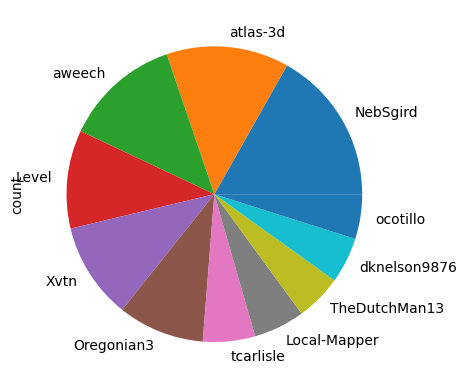

In [24]:
# same plot for @user
highways_df['@user'].value_counts()[highways_df['@user'].value_counts() > 10000].plot(kind='pie')

<Axes: ylabel='count'>

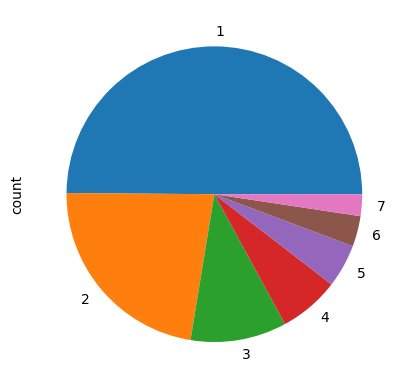

In [26]:
# same for version

highways_df['@version'].value_counts()[highways_df['@version'].value_counts() > 10000].plot(kind='pie')

<Axes: xlabel='@timestamp'>

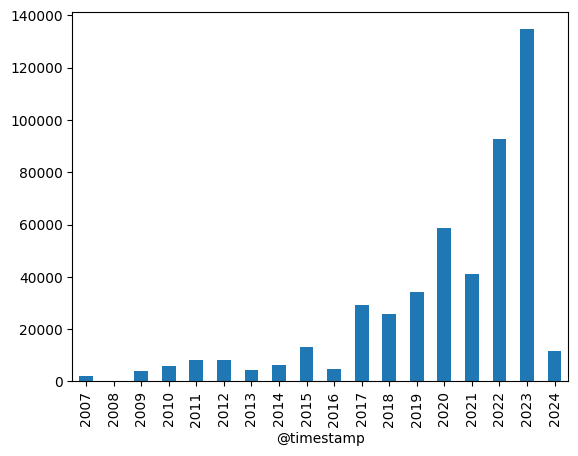

In [27]:
# bar chart for @timestamp by year

highways_df['@timestamp'].str[:4].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='@user'>

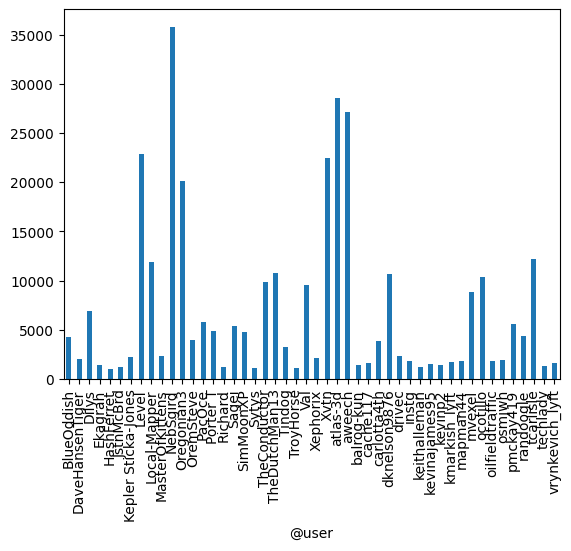

In [29]:
# users over time, only those with more than 1000 edits

highways_df['@user'].value_counts()[highways_df['@user'].value_counts() > 1000].sort_index().plot(kind='bar')
